<a href="https://colab.research.google.com/github/revanth0109/Exploratory-data-analysis-using-python/blob/main/online%20payments%20fraud%20detection%20using%20machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
list = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [8]:
list.head

<bound method NDFrame.head of         step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0          1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1          1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2          1  TRANSFER     181.00  C1305486145         181.00            0.00   
3          1  CASH_OUT     181.00   C840083671         181.00            0.00   
4          1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
...      ...       ...        ...          ...            ...             ...   
341824    16   PAYMENT    3463.03  C1446181326      137107.00       133643.97   
341825    16   PAYMENT      98.96   C752066037       93488.00        93389.04   
341826    16   CASH_IN  278319.05    C50488376       93389.04       371708.09   
341827    16   CASH_IN  323648.70  C1826674225      371708.09       695356.79   
341828    16   CASH_IN   45336.34  C1550631533      695356.79       740693.13  

In [9]:
list.shape

(341829, 11)

In [10]:
list.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0.0      0.0               1
14    CASH_IN   368627.71   C391633425   16216.00       384843.71       C886452342   61713.00        0.00            0.0      0.0               1
                368299.12   C1932412335  49360.00       417659.12       C1285563720  0.00            1288761.20      0.0      0.0               1
                368100.74   C535789728   844731.64      1212832.38      C556076839   811149.62       849013.15       0.0      0.0               1
                368041.45   C94876823    5658332.25     6026373.69      C1107377692  1006965.70      638924.25       0.0      0.0               1
                                                                                                                                 

In [12]:
list['isFlaggedFraud'].value_counts()

0.0    341828
Name: isFlaggedFraud, dtype: int64

In [13]:
list['isFraud'].value_counts()

0.0    341635
1.0       193
Name: isFraud, dtype: int64

In [14]:
list.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
341824,16,PAYMENT,3463.03,C1446181326,137107.00,133643.97,M1467424582,0.00,0.00,0.0,0.0
341825,16,PAYMENT,98.96,C752066037,93488.00,93389.04,M1119815976,0.00,0.00,0.0,0.0
341826,16,CASH_IN,278319.05,C50488376,93389.04,371708.09,C1331875424,2184489.63,1906170.58,0.0,0.0
341827,16,CASH_IN,323648.70,C1826674225,371708.09,695356.79,C114649116,346310.91,22662.22,0.0,0.0
341828,16,CASH_IN,45336.34,C1550631533,695356.79,740693.13,NaN,NaN,NaN,NaN,NaN


In [16]:
list.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [17]:
list.duplicated().sum()

0

In [20]:
list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341829 entries, 0 to 341828
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            341829 non-null  int64  
 1   type            341829 non-null  object 
 2   amount          341829 non-null  float64
 3   nameOrig        341829 non-null  object 
 4   oldbalanceOrg   341829 non-null  float64
 5   newbalanceOrig  341829 non-null  float64
 6   nameDest        341828 non-null  object 
 7   oldbalanceDest  341828 non-null  float64
 8   newbalanceDest  341828 non-null  float64
 9   isFraud         341828 non-null  float64
 10  isFlaggedFraud  341828 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 28.7+ MB


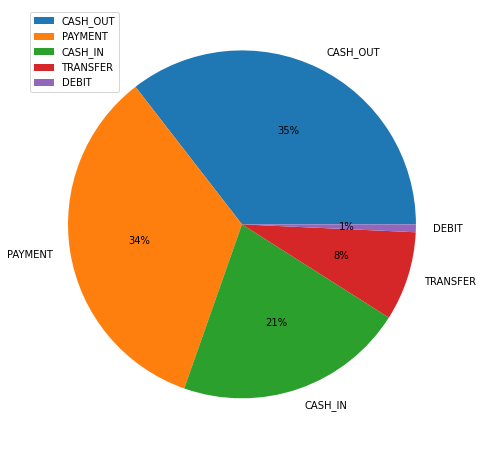

In [21]:
type = list['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

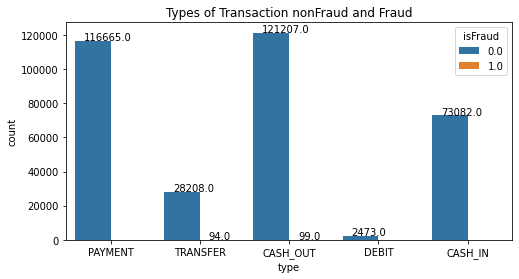

In [24]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x = "type", hue="isFraud", data = list)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [25]:
data1=list[(list['isFraud']==1) & (list['type']=='TRANSFER')]
data1['nameDest'].value_counts()

C553264065     1
C1576053316    1
C184294001     1
C562360384     1
C1281019843    1
              ..
C908043384     1
C1790657739    1
C1379589736    1
C1589547066    1
C428725863     1
Name: nameDest, Length: 94, dtype: int64

In [27]:
data2=list[(list['isFraud']==1) & (list['type']=='CASH_OUT')]
data2['nameOrig'].value_counts()

C840083671     1
C79951219      1
C1894004688    1
C343345083     1
C265790428     1
              ..
C1191732945    1
C1484518113    1
C436661284     1
C1547714604    1
C2140905252    1
Name: nameOrig, Length: 99, dtype: int64

In [28]:
fraud = list[list["isFraud"] == 1]
valid = list[list["isFraud"] == 0]

In [29]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

In [30]:
# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

In [32]:
from pickle import LIST
# adding feature type1
data_new = list.copy() # creating copy of dataset in case I need original dataset
data_new["Type2"] = np.nan # initializing feature column

# filling feature column
data_new.loc[list.nameOrig.str.contains('C') & list.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[list.nameOrig.str.contains('C') & list.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[list.nameOrig.str.contains('M') & list.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[list.nameOrig.str.contains('M') & list.nameDest.str.contains('M'),"Type2"] = "MM"

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

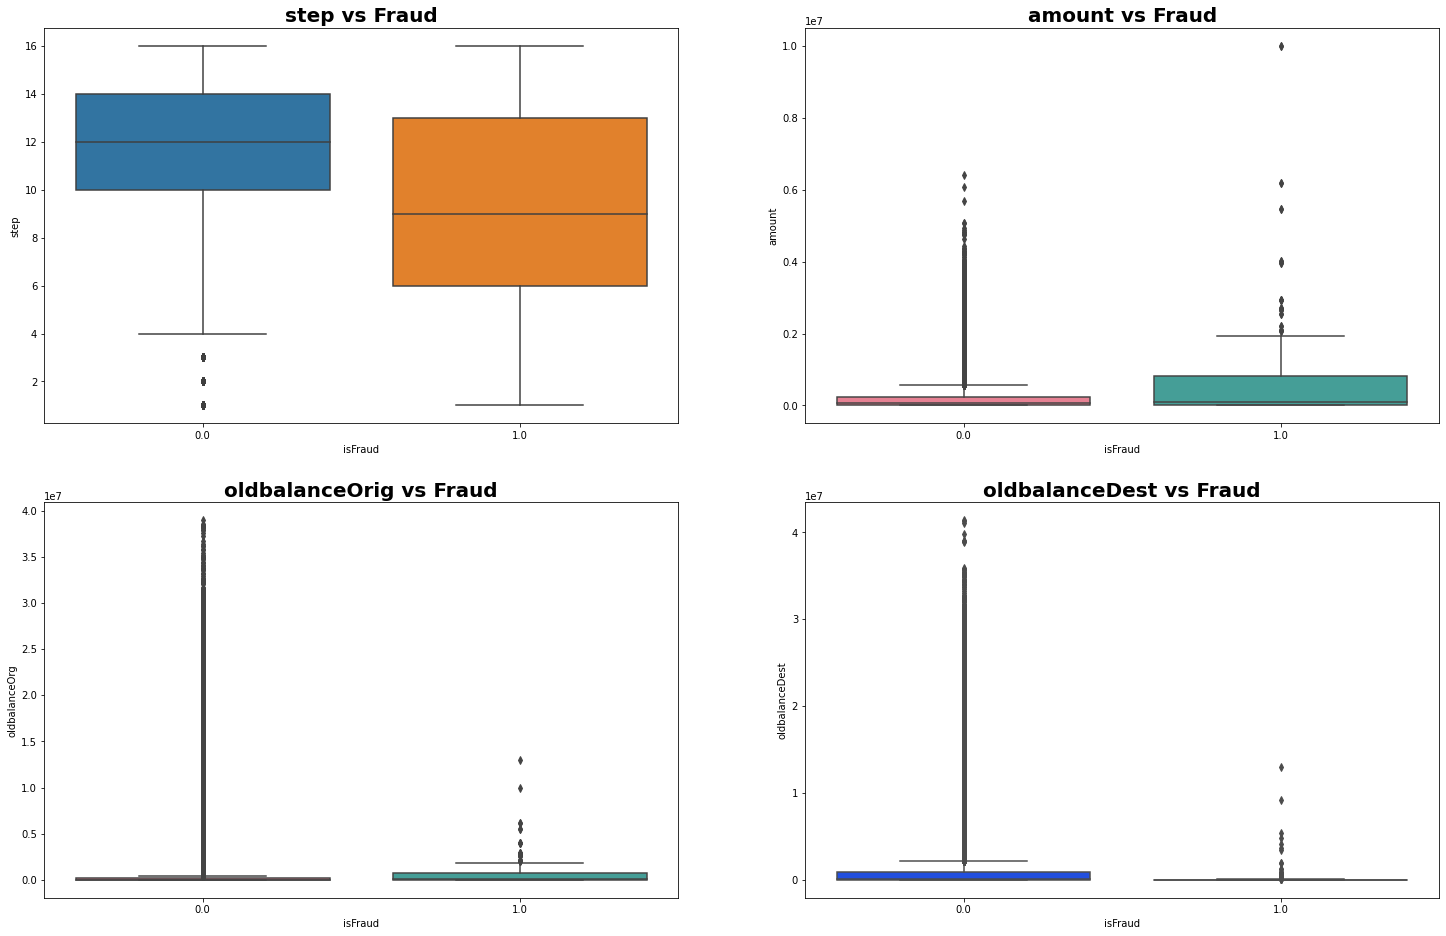

In [33]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data_new)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

In [35]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [36]:
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 CC    193
Name: Type2, dtype: int64

 Valid transactions by type1: 
 CC    224970
CM    116665
Name: Type2, dtype: int64


In [37]:
wrong_orig_bal = sum(list["oldbalanceOrg"] - list["amount"] != list["newbalanceOrig"])
wrong_dest_bal = sum(list["newbalanceDest"] + list["amount"] != list["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(list),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(list),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


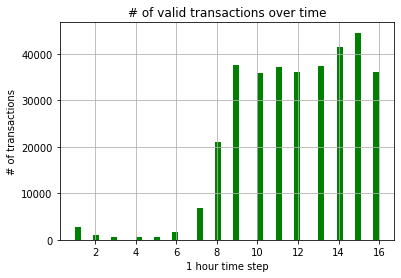

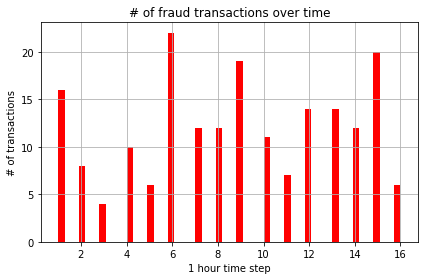

In [38]:
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

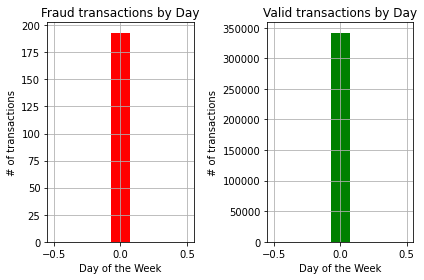

In [40]:
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")
plt.tight_layout()
plt.show()

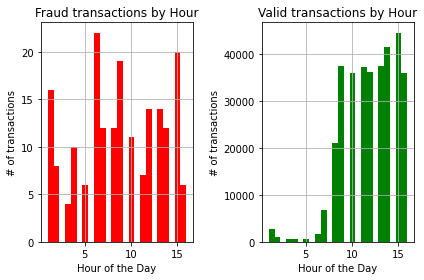

In [41]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()


In [42]:
data_new["HourOfDay"] = np.nan # initializing feature column
data_new.HourOfDay = data_new.step % 24


print("Head of dataset1: \n", pd.DataFrame.head(data_new))

Head of dataset1: 
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud Type2  \
0  M1979787155             0.0             0.0      0.0             0.0    CM   
1  M2044282225             0.0             0.0      0.0             0.0    CM   
2   C553264065             0.0             0.0      1.0             0.0    CC   
3    C38997010         21182.0             0.0      1.0             0.0    CC   
4  M1230701703             0.0             0.0      0.0             0.0    CM   

   HourOfDay  
0          1  
1          1

In [43]:
data_new = data_new.drop(["isFlaggedFraud",'nameOrig','nameDest'],1)

<ipython-input-43-4bcf0d2fb863>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_new = data_new.drop(["isFlaggedFraud",'nameOrig','nameDest'],1)


In [44]:
data_new = pd.get_dummies(data_new,prefix=['type','Type2'],drop_first=True)